- 1. Mearging All data in one dataframe

In [1]:
import pandas as pd
import numpy as np
customer_df = pd.read_csv('Customer.csv')
product_df = pd.read_csv('prod_cat_info.csv')
transaction_df = pd.read_csv('Transactions.csv')

In [2]:
merged_df = pd.merge(customer_df,transaction_df,left_on = 'customer_Id', right_on = 'cust_id' ,how = 'left' )
Customer_Final = pd.merge(product_df,merged_df,left_on=['prod_sub_cat_code', 'prod_cat_code'], right_on=['prod_subcat_code', 'prod_cat_code'], how='left')
Customer_Final.drop(['prod_sub_cat_code', 'prod_cat_code'], axis=1, inplace=True)
Customer_Final

,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type
0,Clothing,Mens,275152,16-01-1970,M,4.0,7.775624e+10,275152.0,10/9/2013,4.0,5.0,308.0,161.700,1701.700,e-Shop
1,Clothing,Mens,268732,06-05-1970,M,2.0,3.688750e+10,268732.0,25-02-2011,4.0,4.0,1150.0,483.000,5083.000,MBR
2,Clothing,Mens,271045,23-05-1970,F,7.0,5.787281e+10,271045.0,24-07-2011,4.0,1.0,359.0,37.695,396.695,TeleShop
3,Clothing,Mens,268627,01-06-1970,M,9.0,4.612913e+10,268627.0,2/1/2014,4.0,3.0,515.0,162.225,1707.225,e-Shop
4,Clothing,Mens,270430,01-06-1970,M,7.0,1.683967e+10,270430.0,29-01-2013,4.0,2.0,1282.0,269.220,2833.220,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,Home and kitchen,Tools,273524,25-11-1992,F,1.0,6.547218e+10,273524.0,26-10-2012,12.0,2.0,578.0,121.380,1277.380,e-Shop
23049,Home and kitchen,Tools,269145,04-12-1992,M,1.0,3.442563e+10,269145.0,9/7/2011,12.0,3.0,1354.0,426.510,4488.510,e-Shop
23050,Home and kitchen,Tools,269277,09-12-1992,F,2.0,6.327098e+10,269277.0,29-06-2012,12.0,4.0,1278.0,536.760,5648.760,e-Shop
23051,Home and kitchen,Tools,267666,24-12-1992,M,6.0,5.009803e+10,267666.0,7/1/2014,12.0,5.0,591.0,310.275,3265.275,e-Shop


- 2.summary report for the merged data set
- a) Get the column names and their corresponding data types

In [3]:
# Customer_Final.columns,Customer_Final.dtypes
for column in Customer_Final.columns:
    print(f" {column}, Data Type: {Customer_Final[column].dtype}")

 prod_cat, Data Type: object
 prod_subcat, Data Type: object
 customer_Id, Data Type: int64
 DOB, Data Type: object
 Gender, Data Type: object
 city_code, Data Type: float64
 transaction_id, Data Type: float64
 cust_id, Data Type: float64
 tran_date, Data Type: object
 prod_subcat_code, Data Type: float64
 Qty, Data Type: float64
 Rate, Data Type: float64
 Tax, Data Type: float64
 total_amt, Data Type: float64
 Store_type, Data Type: object


- b. Top/Bottom 10 observations

In [4]:
top_10 = Customer_Final.head(10)
print("Top_10 observation")
print(top_10)
bottom_10 = Customer_Final.tail(10)
print("\n\nBottom_10 observation")
print(bottom_10)

Top_10 observation
   prod_cat prod_subcat  customer_Id         DOB Gender  city_code  \
0  Clothing        Mens       275152  16-01-1970      M        4.0   
1  Clothing        Mens       268732  06-05-1970      M        2.0   
2  Clothing        Mens       271045  23-05-1970      F        7.0   
3  Clothing        Mens       268627  01-06-1970      M        9.0   
4  Clothing        Mens       270430  01-06-1970      M        7.0   
5  Clothing        Mens       272301  03-06-1970      F        8.0   
6  Clothing        Mens       271031  09-06-1970      F        2.0   
7  Clothing        Mens       267304  03-08-1970      M        4.0   
8  Clothing        Mens       272501  26-08-1970      F        1.0   
9  Clothing        Mens       275134  02-09-1970      F        8.0   

   transaction_id   cust_id   tran_date  prod_subcat_code  Qty    Rate  \
0    7.775624e+10  275152.0   10/9/2013               4.0  5.0   308.0   
1    3.688750e+10  268732.0  25-02-2011               4.0  4.0

- c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [5]:
Five_number_summary = Customer_Final.describe()
continuous_summary = Five_number_summary.loc[['min', '25%', '50%', '75%', 'max']]
continuous_summary.index = ['min', 'Q1', 'median', 'Q3', 'max']
print(continuous_summary)


        customer_Id  city_code  transaction_id   cust_id  prod_subcat_code  \
min        266783.0        1.0    3.268991e+06  266783.0               1.0   
Q1         268935.0        3.0    2.493864e+10  268935.0               3.0   
median     270980.0        5.0    5.009313e+10  270980.0               5.0   
Q3         273114.0        8.0    7.533000e+10  273114.0              10.0   
max        275265.0       10.0    9.998755e+10  275265.0              12.0   

        Qty    Rate      Tax  total_amt  
min    -5.0 -1499.0    7.350  -8270.925  
Q1      1.0   312.0   98.280    762.450  
median  3.0   710.0  199.080   1754.740  
Q3      4.0  1109.0  365.715   3569.150  
max     5.0  1500.0  787.500   8287.500  


- d. Frequency tables for all the categorical variables

In [6]:
for column in Customer_Final.columns:
    if Customer_Final[column].dtype == 'object' :
        frequency_table = Customer_Final[column].value_counts()
        print(f"Frequency table for {column}:")
        print(frequency_table)

Frequency table for prod_cat:
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64
Frequency table for prod_subcat:
prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64
Frequency table for DOB:
DOB
27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
18-11-1991    24
              ..
24-06-1981     1
10-01-1972     1
12-02-1986     1
25-07-1979     1
25-04-1982 

- 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

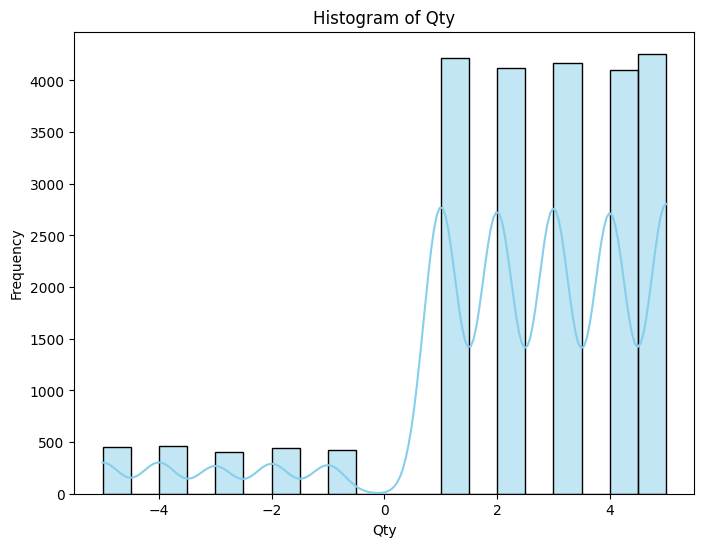

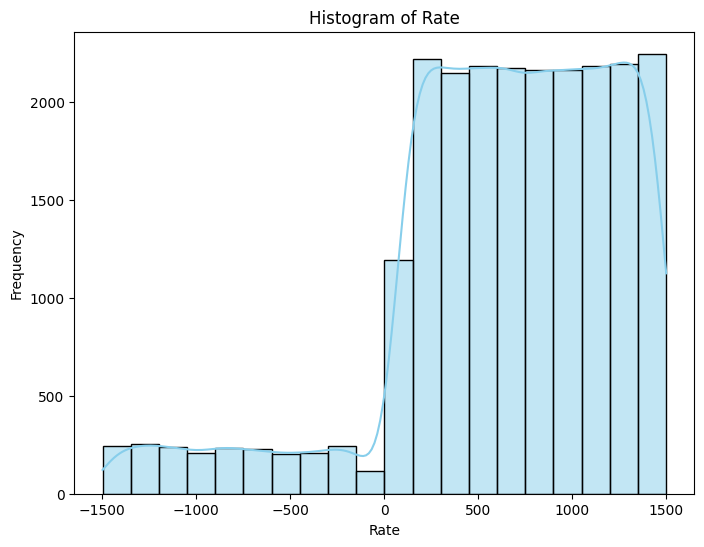

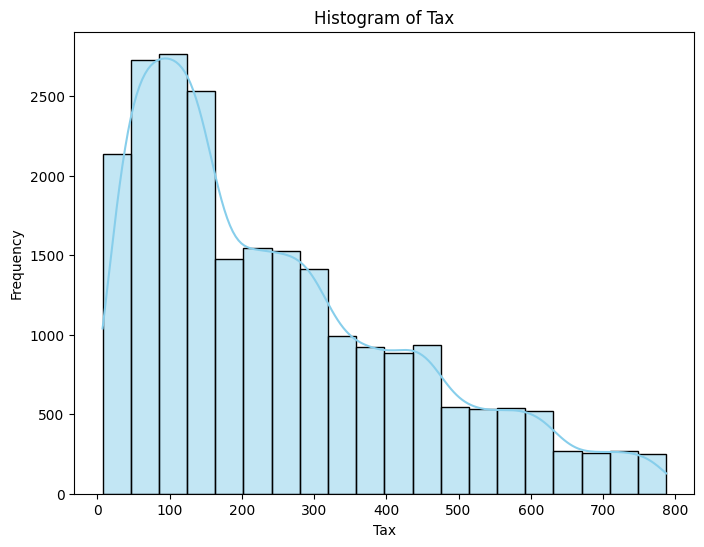

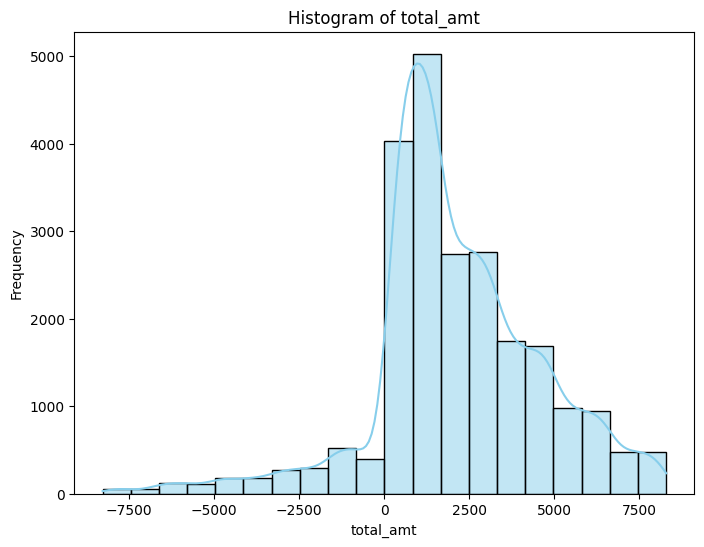

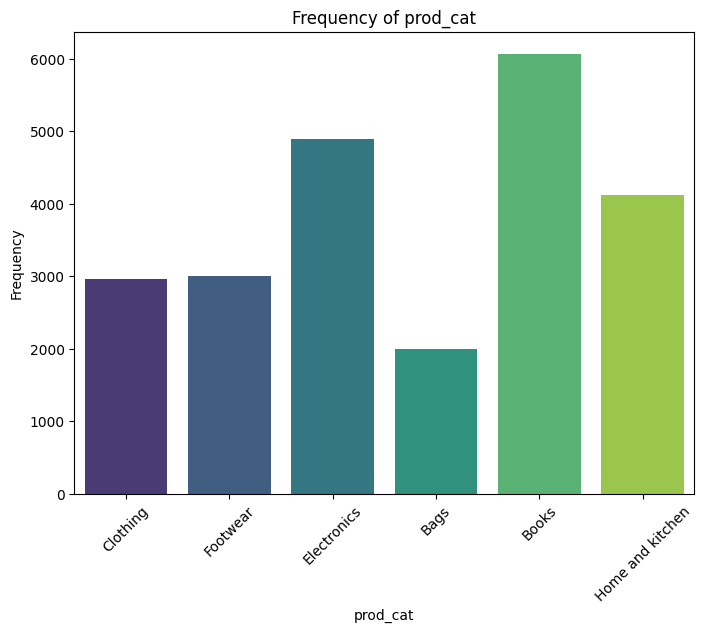

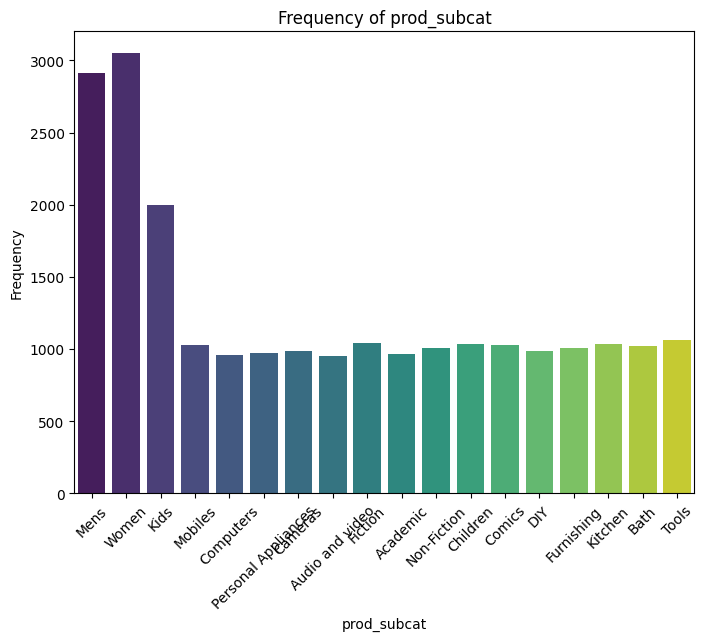

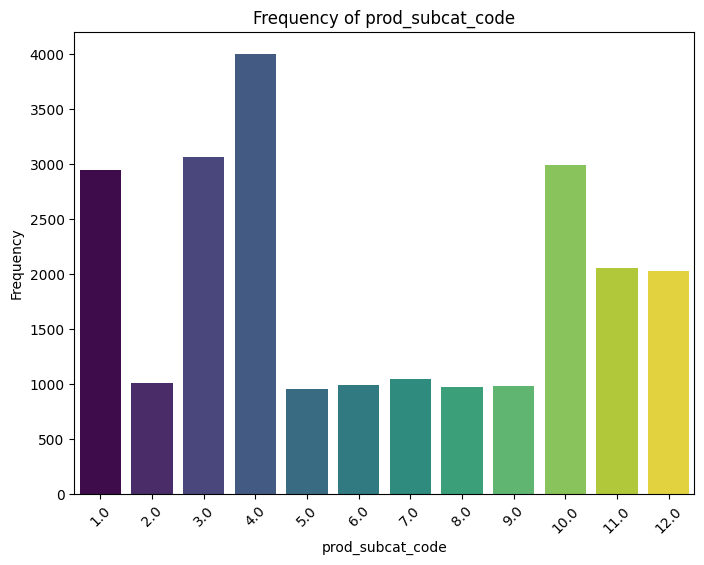

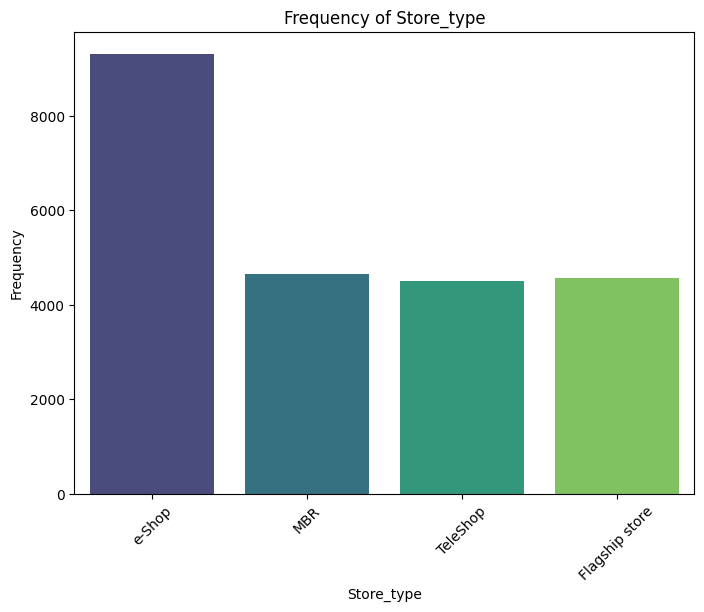

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = ['Qty', 'Rate', 'Tax', 'total_amt']  # Assuming these are continuous variables
categorical_vars = ['prod_cat', 'prod_subcat', 'prod_subcat_code', 'Store_type']  # Assuming these are categorical variables

# Generate histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(Customer_Final[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Generate frequency bars for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=Customer_Final, x=var, hue=var, palette='viridis', legend=False)
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


- 4. Calculate the following information using the merged dataset :
- a. Time period of the available transaction data

In [8]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format='%d-%m-%Y', errors='coerce')
earliest_date = Customer_Final['tran_date'].min()
latest_date = Customer_Final['tran_date'].max()

time_period = (latest_date - earliest_date).days
print("Time Period:", time_period)



Time Period: 1130


- b. Count of transactions where the total amount of transaction was negative

In [9]:
negative_trans =Customer_Final[Customer_Final['total_amt'] < 0 ].shape[0]
negative_trans

2177

- 5. Analyze which product categories are more popular among females vs male customers

In [10]:
Gender_popularity = Customer_Final.groupby(['Gender','prod_cat'])['Qty'].sum().unstack()
Gender_popularity

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362.0,7070.0,3425.0,5832.0,3716.0,4895.0
M,2346.0,7587.0,3748.0,6476.0,3555.0,5041.0


- 6. Which City code has the maximum customers and what was the percentage of customers from
that city?

In [11]:
max_customers_city_code = Customer_Final['city_code'].value_counts().idxmax()
percentage_customers_max_city = (Customer_Final['city_code'].value_counts(normalize=True).max()) * 100

print("City code with the maximum customers:", max_customers_city_code)
print("Percentage of customers from that city: {:.2f}%".format(percentage_customers_max_city))


City code with the maximum customers: 4.0
Percentage of customers from that city: 10.51%


- 7. Which store type sells the maximum products by value and by quantity

In [12]:
store_type = Customer_Final.groupby('Store_type')[['total_amt','Qty']].max()
store_type

,total_amt,Qty
Store_type,,
Flagship store,8254.35,5.0
MBR,8287.50,5.0
TeleShop,8287.50,5.0
e-Shop,8287.50,5.0


In [13]:
store_type_totals = Customer_Final.groupby('Store_type').agg({'total_amt': 'sum', 'Qty': 'sum'})
max_total_amt_store_type = store_type_totals['total_amt'].idxmax()
max_qty_store_type = store_type_totals['Qty'].idxmax()

print("Store type that sells the maximum products by value:", max_total_amt_store_type)
print("Store type that sells the maximum products by quantity:", max_qty_store_type)


Store type that sells the maximum products by value: e-Shop
Store type that sells the maximum products by quantity: e-Shop


- 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [14]:
flagship_transactions = Customer_Final[(Customer_Final['Store_type'] == 'Flagship store') & 
                                       (Customer_Final['prod_cat'].isin(['Electronics', 'Clothing']))]

total_amount_flagship = flagship_transactions['total_amt'].sum()

print("Total amount earned from Electronics and Clothing categories from Flagship Stores:", total_amount_flagship)


Total amount earned from Electronics and Clothing categories from Flagship Stores: 3409559.27


- 9. What was the total amount earned from "Male" customers under the "Electronics" category

In [15]:
total_of_male = Customer_Final[(Customer_Final['Gender'] == 'M') &
                                (Customer_Final['prod_cat'].isin(['Electronics']))]

total_amt_of_male = total_of_male['total_amt'].sum()

formatted_total_amt_of_male = "{:.2f}".format(total_amt_of_male)

print("The total amount earned from 'male' customers under the 'Electronics' category:", formatted_total_amt_of_male)


The total amount earned from 'male' customers under the 'Electronics' category: 5703109.43


- 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [23]:
positive_trans = Customer_Final[Customer_Final['total_amt'] > 0]
customer_unique_trans = positive_trans.groupby('cust_id')['transaction_id'].nunique()

customers_more_than_10_trans = customer_unique_trans[customer_unique_trans > 10]

num_customers_more_than_10_trans = len(customers_more_than_10_trans)

print("Number of customers with more than 10 unique transactions:", num_customers_more_than_10_trans)


Number of customers with more than 10 unique transactions: 6


- 11. For all customers aged between 25 - 35, find out:\n
- a. What was the total amount spent for “Electronics” and “Books” product categories?

In [17]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%d-%m-%Y')

Customer_Final['Age'] = pd.Timestamp.now().year - Customer_Final['DOB'].dt.year

filtered_transactions = Customer_Final[(Customer_Final['Age'] >= 25) & (Customer_Final['Age'] <= 35) &
                                        (Customer_Final['prod_cat'].isin(['Electronics', 'Books']))]

total_amount_spent = filtered_transactions['total_amt'].sum()

print("Total amount spent for Electronics and Books by customers aged between 25 and 35:", total_amount_spent)


Total amount spent for Electronics and Books by customers aged between 25 and 35: 3928470.585


In [18]:
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [19]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format='%d-%m-%Y')

filtered_transactions = Customer_Final[(Customer_Final['tran_date'] >= '2014-01-01') & 
                                       (Customer_Final['tran_date'] <= '2014-03-01') &
                                       (Customer_Final['Age'] >= 25) &
                                       (Customer_Final['Age'] <= 35)]

total_amount_spent = filtered_transactions['total_amt'].sum()
total_amount_spent = round(total_amount_spent, 2)

print("Total amount spent by customers aged between 25 and 35 between 1st Jan, 2014 to 1st Mar, 2014:", total_amount_spent)


Total amount spent by customers aged between 25 and 35 between 1st Jan, 2014 to 1st Mar, 2014: 236155.08
